<a href="https://colab.research.google.com/github/r12habh/Scaler-DSML/blob/main/Aerofit_Descriptive_Statistics_%26_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Problem Statement and Analysing basic metrics:
* This EDA is around the top of the line product KP781.
* And finding the untapped customers.
* Along with some insight about the current customer base.
```



*use Table of contents*

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Data set

In [ ]:
aerofit_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv')
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Non Graphical Analysis

### Play with data

In [ ]:
aerofit_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Income:	Annual income (in $)

Miles:	The average number of miles the customer expects to walk/run each week


In [ ]:
aerofit_df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
aerofit_df.shape

(180, 9)

**There are 180 rows & 9 columns in the dataset.**

In [ ]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**3 categorical columns: Product, Gender, MaritalStatus.**

In [ ]:
aerofit_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**There are no missing / NaN values in the dataset.**

In [ ]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Marketing Tip: People who own one of aerofit products, go atleast 21 miles per week and on average 103.2 miles per week.**

Tell this finding to the customers.

In [ ]:
aerofit_df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
aerofit_df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
aerofit_df['Age'].value_counts().sort_index()

18     1
19     4
20     5
21     7
22     7
23    18
24    12
25    25
26    12
27     7
28     9
29     6
30     7
31     6
32     4
33     8
34     6
35     8
36     1
37     2
38     7
39     1
40     5
41     1
42     1
43     1
44     1
45     2
46     1
47     2
48     2
50     1
Name: Age, dtype: int64

**Seems like most of the target consumers are in the late 20s age group 25 to 29.**

In [ ]:
aerofit_df['Gender'].value_counts(dropna=False)

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
aerofit_df['Education'].value_counts(dropna=False)

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
aerofit_df['MaritalStatus'].value_counts(dropna=False)

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
aerofit_df['Usage'].value_counts(dropna=False)

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
aerofit_df['Fitness'].value_counts(dropna=False)

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
aerofit_df['Income'].value_counts(dropna=False)

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [ ]:
aerofit_df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [ ]:
aerofit_df[['Product', 'Gender', 'MaritalStatus']].value_counts()

Product  Gender  MaritalStatus
KP281    Female  Partnered        27
         Male    Partnered        21
KP481    Male    Partnered        21
KP281    Male    Single           19
KP781    Male    Partnered        19
KP481    Female  Partnered        15
                 Single           14
KP781    Male    Single           14
KP281    Female  Single           13
KP481    Male    Single           10
KP781    Female  Partnered         4
                 Single            3
dtype: int64

### Gender

In [ ]:
pd.crosstab(index=aerofit_df['Gender'], columns=aerofit_df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [ ]:
pd.crosstab(index=aerofit_df['Gender'], columns=aerofit_df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


**Basic product: KP281 is bought by more than 44% of people.** 

**Tip: Hence, aerofit needs to market the other 2 products more.**

In [ ]:
aerofit_df.groupby('Gender')['Product'].value_counts()

Gender  Product
Female  KP281      40
        KP481      29
        KP781       7
Male    KP281      40
        KP781      33
        KP481      31
Name: Product, dtype: int64

In [ ]:
aerofit_df.groupby('Gender')['Product'].count()

Gender
Female     76
Male      104
Name: Product, dtype: int64

In [ ]:
(aerofit_df.groupby('Gender')['Product'].value_counts()/aerofit_df.groupby('Gender')['Product'].count()).unstack()*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769


**Among all female customers KP281 is most famous product.**

**Tip: Efforts need to be put in to showcase the KP781 product amongst potential female customers.**

In [ ]:
(aerofit_df.groupby('Product')['Gender'].value_counts()/aerofit_df.groupby('Product')['Gender'].count()).unstack()*100

Gender,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.500000,82.500000


**Majority (82.5%) of KP781 customers are male. And for the other two products its almost equal.**

### Marital Status

In [ ]:
pd.crosstab(index=aerofit_df['MaritalStatus'], columns=aerofit_df['Product'], margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [ ]:
pd.crosstab(index=aerofit_df['MaritalStatus'], columns=aerofit_df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
(aerofit_df.groupby('MaritalStatus')['Product'].value_counts()/aerofit_df.groupby('MaritalStatus')['Product'].count()).unstack()*100

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.859813,33.644860,21.495327
Single,43.835616,32.876712,23.287671


In [ ]:
(aerofit_df.groupby(['MaritalStatus', 'Gender'])['Product'].value_counts()/aerofit_df.groupby(['MaritalStatus', 'Gender'])['Product'].count()).unstack()*100

Product                   KP281      KP481      KP781
MaritalStatus Gender                                 
Partnered     Female  58.695652  32.608696   8.695652
              Male    34.426230  34.426230  31.147541
Single        Female  43.333333  46.666667  10.000000
              Male    44.186047  23.255814  32.558140

In [ ]:
(aerofit_df.groupby(['Gender', 'MaritalStatus'])['Product'].value_counts()/aerofit_df.groupby(['Gender', 'MaritalStatus'])['Product'].count()).unstack()*100

Product                   KP281      KP481      KP781
Gender MaritalStatus                                 
Female Partnered      58.695652  32.608696   8.695652
       Single         43.333333  46.666667  10.000000
Male   Partnered      34.426230  34.426230  31.147541
       Single         44.186047  23.255814  32.558140

In [ ]:
(aerofit_df.groupby(['MaritalStatus', 'Product'])['Gender'].value_counts()/aerofit_df.groupby(['MaritalStatus', 'Product'])['Gender'].count()).unstack()*100

Gender                    Female       Male
MaritalStatus Product                      
Partnered     KP281    56.250000  43.750000
              KP481    41.666667  58.333333
              KP781    17.391304  82.608696
Single        KP281    40.625000  59.375000
              KP481    58.333333  41.666667
              KP781    17.647059  82.352941

Observations:

**Partnered females (56.25%) buy more KP281 than males.**

**Single females (58.33%) buy more KP481 than single males.**

**Both Partnered males (82.61%) & singles males (82.35%) are the larger consumer of KP781, the $2,500 treadmill.**

Tip:

**On Insta slides, women should get cheaper product's slides before the costlier ones, whereas men should get the costlier ones before.**


### Fitness

In [ ]:
pd.crosstab(index=aerofit_df['Fitness'], columns=aerofit_df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1,1,0,2
2,14,12,0,26
3,54,39,4,97
4,9,8,7,24
5,2,0,29,31
All,80,60,40,180


In [ ]:
pd.crosstab(index=aerofit_df['Fitness'], columns=aerofit_df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.555556,0.555556,0.000000,1.111111
2,7.777778,6.666667,0.000000,14.444444
3,30.000000,21.666667,2.222222,53.888889
4,5.000000,4.444444,3.888889,13.333333
5,1.111111,0.000000,16.111111,17.222222
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
(aerofit_df.groupby('Fitness')['Product'].value_counts()/aerofit_df.groupby('Fitness')['Product'].count()).unstack()*100

Product,KP281,KP481,KP781
Fitness,,,
1,50.000000,50.000000,NaN
2,53.846154,46.153846,NaN
3,55.670103,40.206186,4.123711
4,37.500000,33.333333,29.166667
5,6.451613,NaN,93.548387


In [ ]:
(aerofit_df.groupby('Product')['Fitness'].value_counts()/aerofit_df.groupby('Product')['Fitness'].count()).unstack()*100

Fitness,1,2,3,4,5
Product,,,,,
KP281,1.250000,17.5,67.5,11.250000,2.5
KP481,1.666667,20.0,65.0,13.333333,NaN
KP781,NaN,NaN,10.0,17.500000,72.5


**72.5% people who use the top product KP781, rate themselves 5 on 5 for fitness after using the product. The remaining 27.5% people give themselves 3 or 4.**

Can be used for marketing strategy, by showing higher CSAT for KP781.

In [ ]:
aerofit_df.groupby(['Product', 'Gender'])['Fitness'].value_counts().unstack()

Fitness           1     2     3    4     5
Product Gender                            
KP281   Female  NaN  10.0  26.0  3.0   1.0
        Male    1.0   4.0  28.0  6.0   1.0
KP481   Female  1.0   6.0  18.0  4.0   NaN
        Male    NaN   6.0  21.0  4.0   NaN
KP781   Female  NaN   NaN   1.0  1.0   5.0
        Male    NaN   NaN   3.0  6.0  24.0

# Graphical Analysis

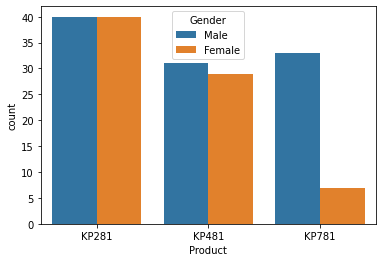

In [ ]:
sns.countplot(x='Product', hue='Gender', data=aerofit_df)

**Observation: Female buyers are less for the costlier products, compared to males.**

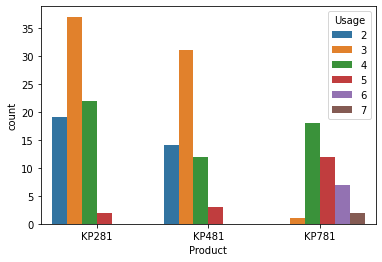

In [ ]:
sns.countplot(x='Product', hue='Usage', data=aerofit_df)

**Obesrvation: Most top product owners uses it for 4 or more times a week.**

Can be used for marketing top product.

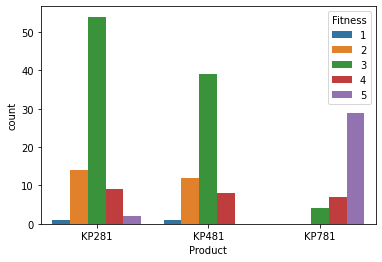

In [ ]:
sns.countplot(x='Product', hue='Fitness', data=aerofit_df)

**Observation: Because of higher usage, self-rated fitness rating is higer in top product owned users.**

In [ ]:
aerofit_df.groupby(['Gender', 'MaritalStatus', 'Product']).mean()['Miles'].unstack()

Product                   KP281      KP481       KP781
Gender MaritalStatus                                  
Female Partnered      74.925926  94.000000  215.000000
       Single         78.846154  80.214286  133.333333
Male   Partnered      80.190476  87.238095  176.315789
       Single         99.526316  91.100000  147.571429

**Observation: On average single males are running/walking more miles per week compared to partnered males 😆 except for the KP781 product.**



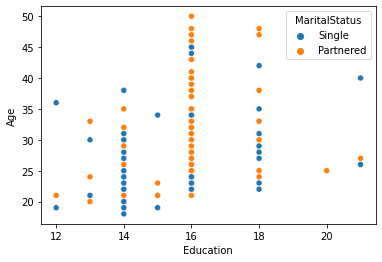

In [ ]:
sns.scatterplot(x='Education', y='Age', hue='MaritalStatus', data=aerofit_df)

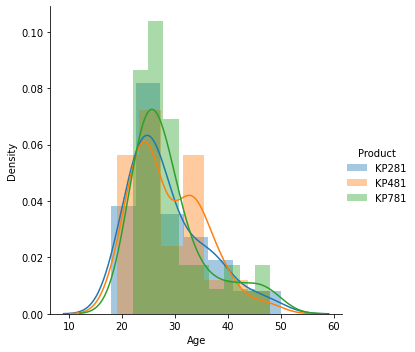

In [ ]:
sns.FacetGrid(aerofit_df, hue='Product', size=5).map(sns.distplot, 'Age').add_legend()

Observations:

**All the Aerofit products are mostly popular amongst the age group 25 to 29.**

**KP481 is also highly bought amongst the age group 30 to 35.**

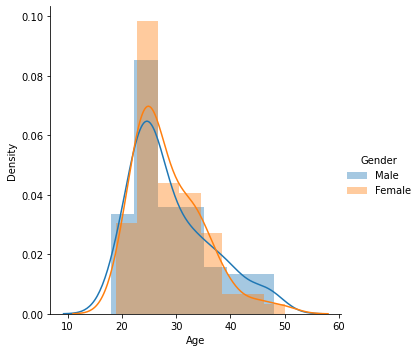

In [ ]:
sns.FacetGrid(aerofit_df, hue='Gender', size=5).map(sns.distplot, 'Age').add_legend()

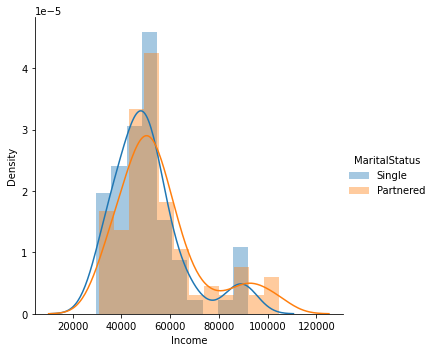

In [ ]:
sns.FacetGrid(aerofit_df, hue='MaritalStatus', size=5).map(sns.distplot, 'Income').add_legend()

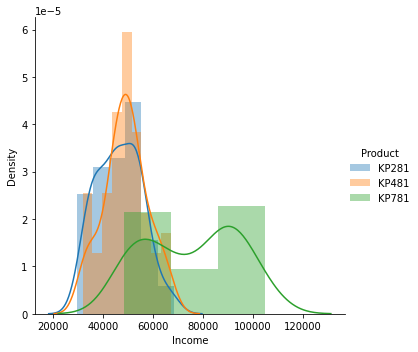

In [ ]:
sns.FacetGrid(aerofit_df, hue='Product', size=5).map(sns.distplot, 'Income').add_legend()

## Correlation

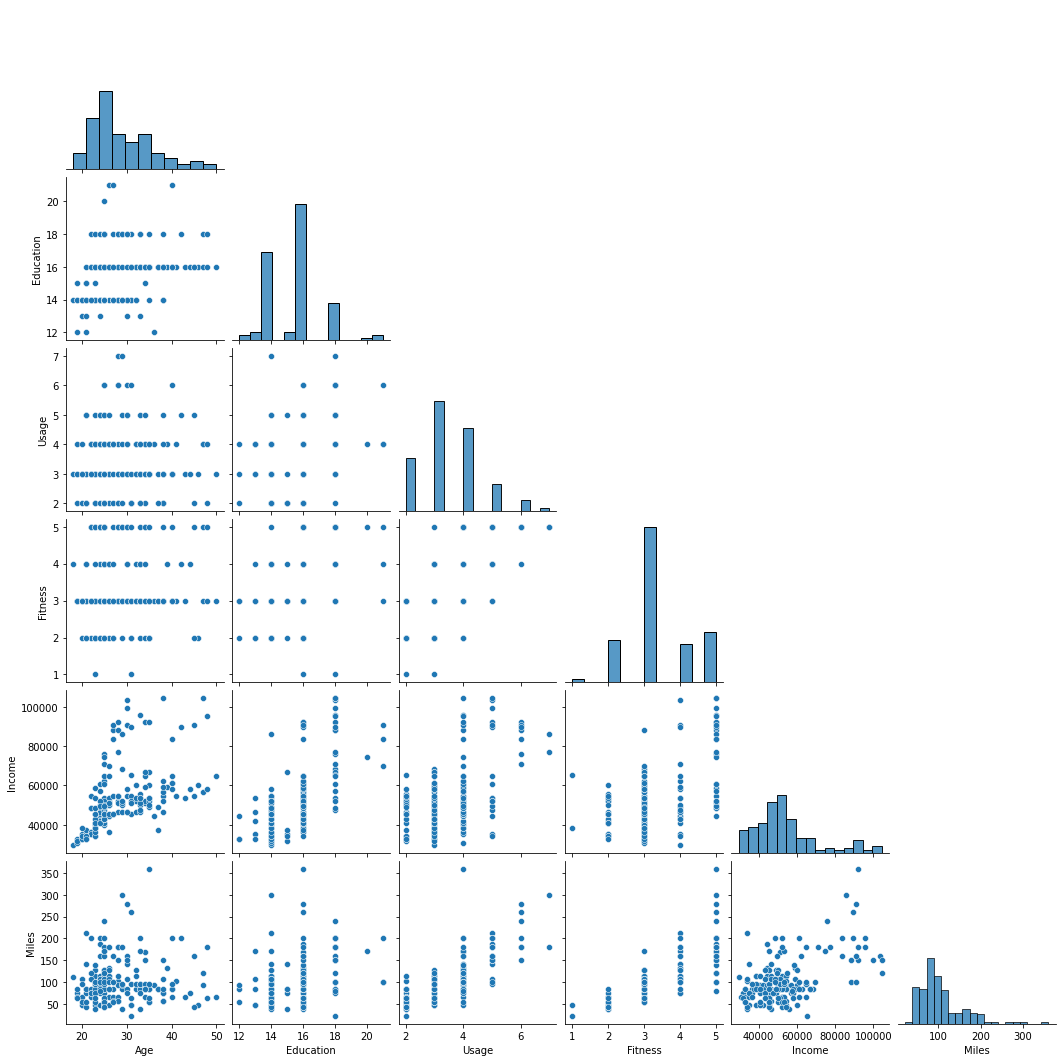

In [ ]:
sns.pairplot(aerofit_df, corner=True)

**Observation: Young (18-21 years old) and higher-income (40k plus) people aren't Aerofit's customers, and also old (40+ years old) and low income (less than 50k)**

**Tip: Brand needs to reach out to young (18-21 y.o.) people with higher salaries and 40+ y.o. people with lower salaries.**

In [ ]:
aerofit_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


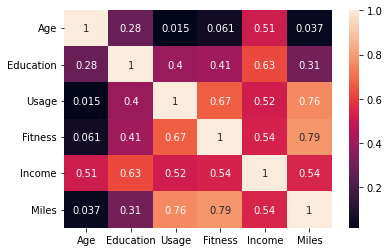

In [ ]:
sns.heatmap(aerofit_df.corr(), annot=True)

**Variables with higher correlation**

Age - Income

Education - Income

Usage - Miles

Fitness - Miles

Income - Education

Miles - Fitness

## Product (Boxplots)

### Age

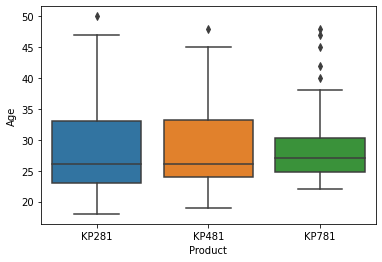

In [ ]:
sns.boxplot(x='Product', y='Age', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

**Observation: The average age of aerofit users is around 28-29 years old.**

### Education

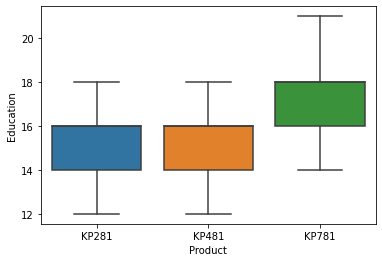

In [ ]:
sns.boxplot(x='Product', y='Education', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

**Tip: People with more education seems like the market for KP781. Hence they should be targeted.**



### Usage

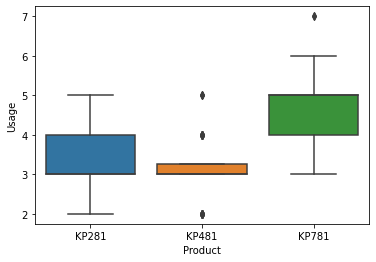

In [ ]:
sns.boxplot(x='Product', y='Usage', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

### Fitness

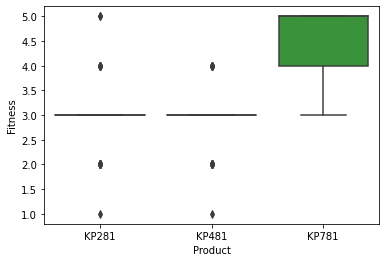

In [ ]:
sns.boxplot(x='Product', y='Fitness', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

### Income

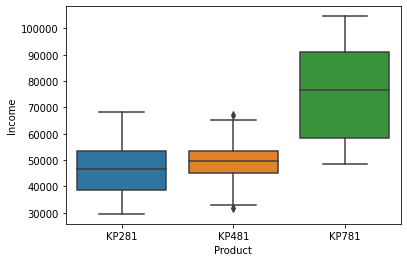

In [ ]:
sns.boxplot(x='Product', y='Income', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Product')['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

Higher income people are buying advanced model.

### Miles

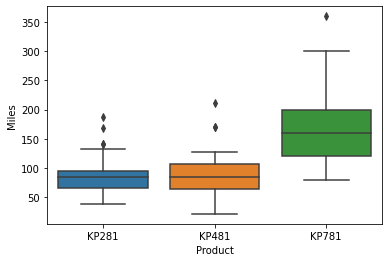

In [ ]:
sns.boxplot(x='Product', y='Miles', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Product')['Miles'].mean()

Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64

## Gender (Boxplots w/ Outliers removal)

### Age

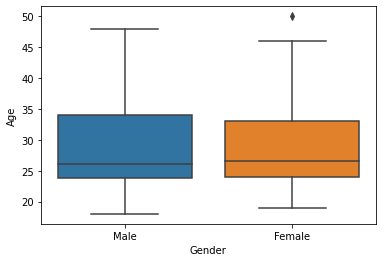

In [ ]:
sns.boxplot(x='Gender', y='Age', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Gender')['Age'].mean()

Gender
Female    28.565789
Male      28.951923
Name: Age, dtype: float64

### Education

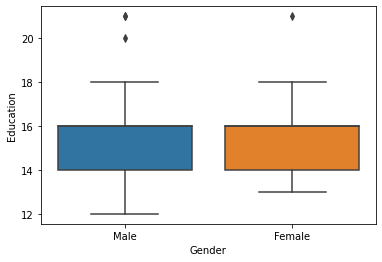

In [ ]:
sns.boxplot(x='Gender', y='Education', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Gender')['Education'].mean()

Gender
Female    15.394737
Male      15.701923
Name: Education, dtype: float64

In [ ]:
q1 = aerofit_df['Education'].quantile(.25)
q3 = aerofit_df['Education'].quantile(.75)

iqr = q3 - q1

education_df = aerofit_df[(aerofit_df['Education'] > q1-1.5*iqr) & (aerofit_df['Education'] < q3+1.5*iqr)]

In [ ]:
education_df.groupby('Gender')['Education'].mean()

Gender
Female    15.320000
Male      15.554455
Name: Education, dtype: float64

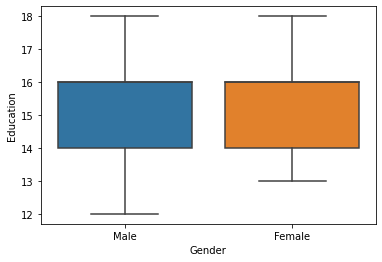

In [ ]:
sns.boxplot(x='Gender', y='Education', data=education_df)

### Usage

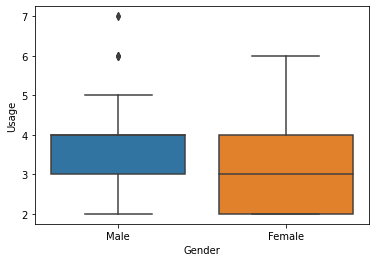

In [ ]:
sns.boxplot(x='Gender', y='Usage', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Gender')['Usage'].mean()

Gender
Female    3.184211
Male      3.653846
Name: Usage, dtype: float64

In [ ]:
q1 = aerofit_df['Usage'].quantile(.25)
q3 = aerofit_df['Usage'].quantile(.75)

iqr = q3 - q1

usage_df = aerofit_df[(aerofit_df['Usage'] > q1-1.5*iqr) & (aerofit_df['Usage'] < q3+1.5*iqr)]

In [ ]:
usage_df.groupby('Gender')['Usage'].mean()

Gender
Female    3.108108
Male      3.463918
Name: Usage, dtype: float64

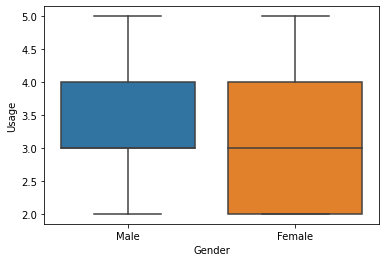

In [ ]:
sns.boxplot(x='Gender', y='Usage', data=usage_df)

### Fitness

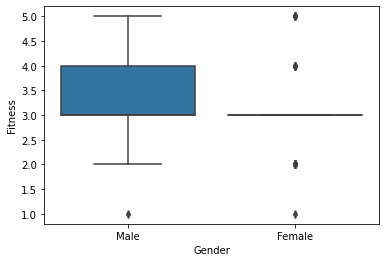

In [ ]:
sns.boxplot(x='Gender', y='Fitness', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Gender')['Fitness'].mean()

Gender
Female    3.026316
Male      3.519231
Name: Fitness, dtype: float64

In [ ]:
q1 = aerofit_df['Fitness'].quantile(.25)
q3 = aerofit_df['Fitness'].quantile(.75)

iqr = q3 - q1

fitness_df = aerofit_df[(aerofit_df['Fitness'] > q1-1.5*iqr) & (aerofit_df['Fitness'] < q3+1.5*iqr)]

In [ ]:
fitness_df.groupby('Gender')['Fitness'].mean()

Gender
Female    3.053333
Male      3.543689
Name: Fitness, dtype: float64

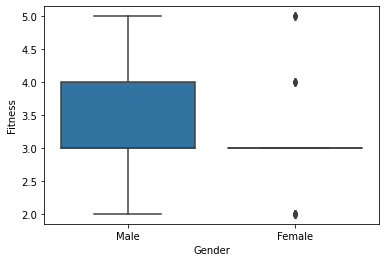

In [ ]:
sns.boxplot(x='Gender', y='Fitness', data=fitness_df)

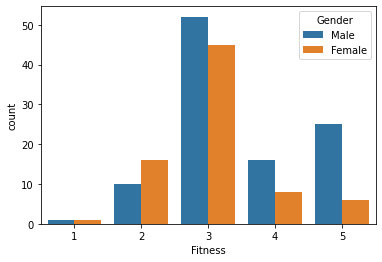

In [ ]:
sns.countplot(x='Fitness', data=aerofit_df, hue='Gender')

### Income

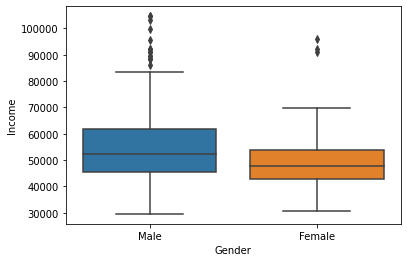

In [ ]:
sns.boxplot(x='Gender', y='Income', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Gender')['Income'].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

In [ ]:
q1 = aerofit_df['Income'].quantile(.25)
q3 = aerofit_df['Income'].quantile(.75)

iqr = q3 - q1

income_df = aerofit_df[(aerofit_df['Income'] > q1-1.5*iqr) & (aerofit_df['Income'] < q3+1.5*iqr)]

In [ ]:
income_df.groupby('Gender')['Income'].mean()

Gender
Female    48056.356164
Male      50000.840909
Name: Income, dtype: float64

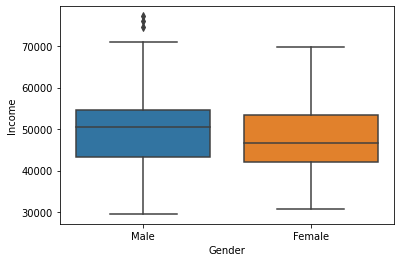

In [ ]:
sns.boxplot(x='Gender', y='Income', data=income_df)

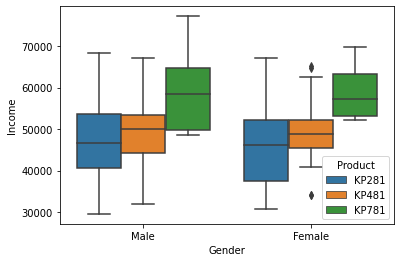

In [ ]:
sns.boxplot(x='Gender', y='Income', hue='Product', data=income_df)

### Miles

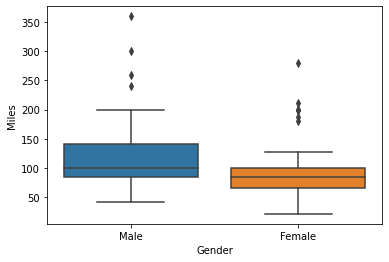

In [ ]:
sns.boxplot(x='Gender', y='Miles', data=aerofit_df)

In [ ]:
aerofit_df.groupby('Gender')['Miles'].mean()

Gender
Female     90.013158
Male      112.826923
Name: Miles, dtype: float64

In [ ]:
q1 = aerofit_df['Miles'].quantile(.25)
q3 = aerofit_df['Miles'].quantile(.75)

iqr = q3 - q1

miles_df = aerofit_df[(aerofit_df['Miles'] > q1-1.5*iqr) & (aerofit_df['Miles'] < q3+1.5*iqr)]

In [ ]:
miles_df.groupby('Gender')['Miles'].mean()

Gender
Female     79.442857
Male      102.824742
Name: Miles, dtype: float64

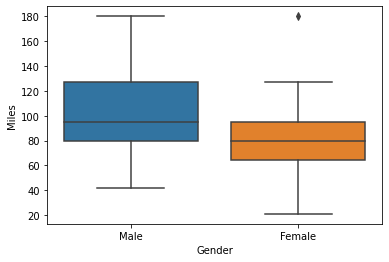

In [ ]:
sns.boxplot(x='Gender', y='Miles', data=miles_df)

## Income

In [ ]:
# Age - Income - Fitness - FB Marketplace Ad Targetting ??
# Income - Advanced Product - Plot below

### Education

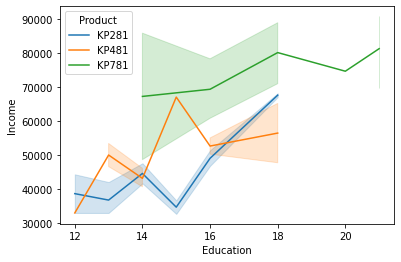

In [ ]:
sns.lineplot(x='Education', y='Income', data=aerofit_df, hue='Product')

### Age

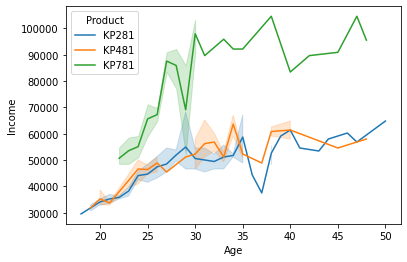

In [ ]:
sns.lineplot(x='Age', y='Income', data=aerofit_df, hue='Product')

In [ ]:
aerofit_df['Age-Bin'] = pd.cut(x=aerofit_df['Age'], bins=[0, 19, 29, 39, 49, 59],
       labels=['0-19', '20-29', '30-39', '40-49', '50-59'])

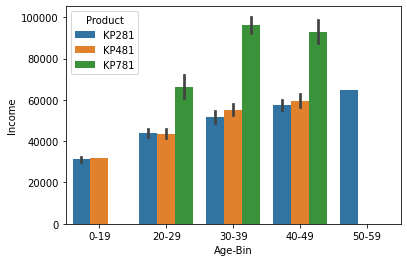

In [ ]:
sns.barplot(x='Age-Bin', y='Income', hue='Product', data=aerofit_df)

### **More education, higher income, top of the line product, higher usage, more fitness rating. Hence people with higher education probably with a masters degree i.e., around 17 years of education should be targeted even more to buy the best product KP781.**